In [1]:
from travelling_salesman import Route, calculate_distance, node_swapper, map24_random, map150_greedy, map150_random, map1000_greedy
from matplotlib import pyplot as plt
from statistics import mean
import random
import math

# function calculating acceptance probability
def acceptance_probability(current, new, temp):
    if new < current:
        return 1
    else:
        return math.exp( (current-new)/temp )

def simulated_annealing(route, tmax, tmin, alpha, verbose=True):
    if verbose == True:
        print(f"Running Simulated Annealing. Starting temperature = {tmax}, minimum temperature = {tmin}, alpha = {alpha}")
        print("Initial route:")
        route.plot()
    current = route.distance
    dists = []
    temp = tmax
    p = route.path
    while temp > tmin:
        new_p = node_swapper(p)
        new_p_dist = calculate_distance(route.map, new_p)
        temp *= alpha
        if acceptance_probability(current, new_p_dist, temp) > random.random():
            p = list(new_p)
            current = calculate_distance(route.map, p)
            dists.append(current)
    if verbose == True:
        new_route = Route(route.map, p)
        print("Final route:")
        new_route.plot()
        plt.figure(figsize=(6, 5))
        plt.subplots_adjust(top=0.75)
        plt.plot(dists)
        plt.suptitle(f"Starting temperature = {tmax}\nMinimum temperature = {tmin}\nAlpha = {alpha}\nStarting distance = {dists[0]}\nFinal Distance = {dists[-1]}")
        plt.show()
    else:
        return dists[-1]

Running Simulated Annealing. Starting temperature = 10, minimum temperature = 0.0001, alpha = 0.999
Initial route:


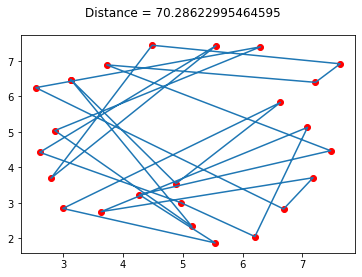

Final route:


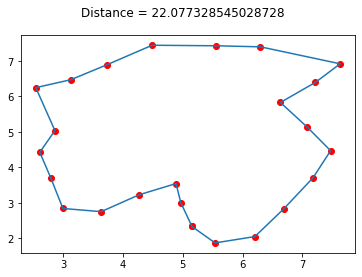

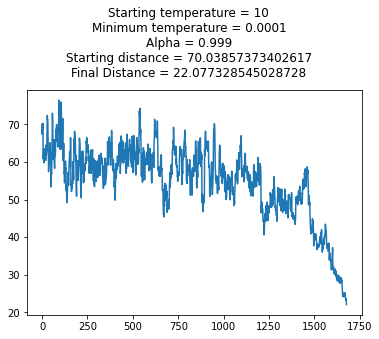

Wall time: 331 ms


In [2]:
%%time
simulated_annealing(map24_random, 10, 0.0001, 0.999)

Running Simulated Annealing. Starting temperature = 40, minimum temperature = 0.0001, alpha = 0.9999
Initial route:


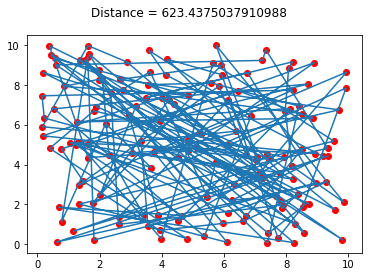

Final route:


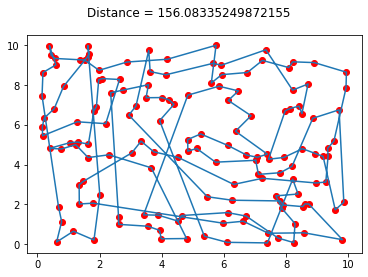

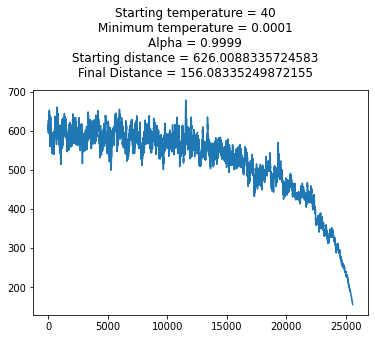

Wall time: 3.03 s


In [3]:
%%time
simulated_annealing(map150_random, 40, 0.0001, 0.9999)

Running Simulated Annealing. Starting temperature = 0.2, minimum temperature = 0.0001, alpha = 0.9999
Initial route:


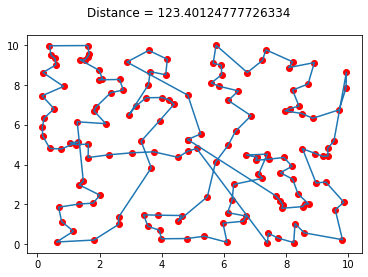

Final route:


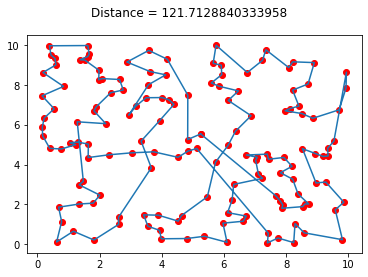

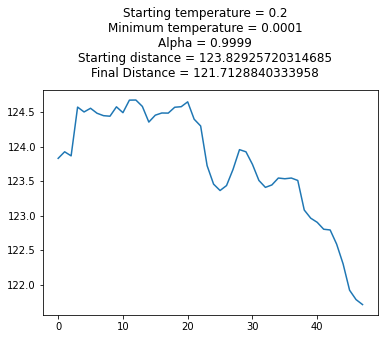

Wall time: 1.62 s


In [4]:
%%time
simulated_annealing(map150_greedy, 0.2, 0.0001, 0.9999)

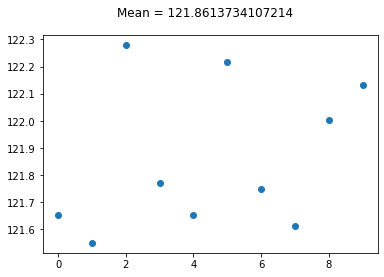

Wall time: 13.7 s


In [5]:
%%time
results = []
for i in range(10):
    results.append(simulated_annealing(map150_greedy, 0.2, 0.0001, 0.9999, verbose=False))

plt.scatter(range(10), results)
plt.suptitle(f"Mean = {mean(results)}")
plt.show()

Running Simulated Annealing. Starting temperature = 0.15, minimum temperature = 1e-05, alpha = 0.99993
Initial route:


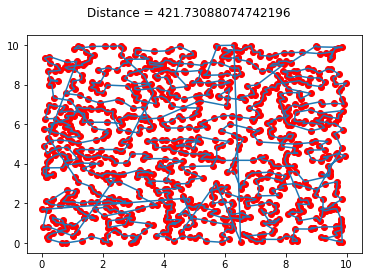

Final route:


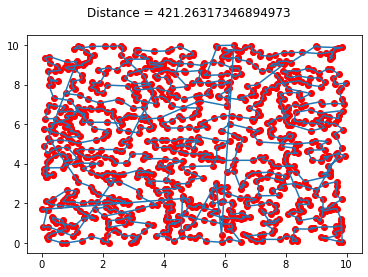

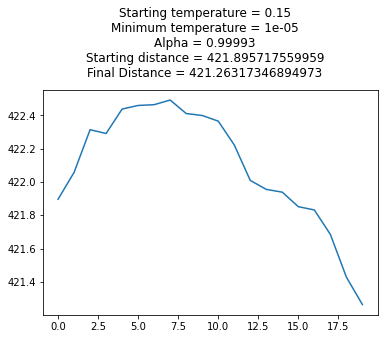

Wall time: 23 s


In [6]:
%%time
simulated_annealing(map1000_greedy, 0.15, 0.00001, 0.99993)